# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [2]:
# Import the libraries you'll need here.

# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns
# This command tells python to use seaborn for its styling.
sns.set()

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# Provides z-score helper function
import scipy.stats as stats

# Load the cars csv file into a pandas dataframe.


In [3]:
# Load the csv file into a pandas dataframe.

df = pd.read_csv('data/cars.csv', sep=',')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [4]:
# 1. Print the number of duplicate rows we have in our dataframe.

df.duplicated().sum() # Just print out the sum of duplicates
# Originally was 720 duplicates

720

In [5]:
#  2. Modify our df to have all duplicate rows removed. 

print(df.shape) # Before
df = df.drop_duplicates() # Remove duplicate rows 
print(df.shape) # After

(11914, 15)
(11194, 15)


In [6]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

print(df.shape)
df.duplicated().sum() # Just ran this piece of code again make sure to get 0

(11194, 15)


0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [7]:
# * Which column has the most null values and how many null values does it have?

#Answer: Engine HP - 69

df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [8]:
# * Print how long (aka how many rows) our dataframe is.

# Answer: 15

df.info() # Just counted the amount of rows here but there may be a better way than counting yourself

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11194 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11194 non-null  object 
 1   Model              11194 non-null  object 
 2   Year               11194 non-null  int64  
 3   Engine Fuel Type   11191 non-null  object 
 4   Engine HP          11125 non-null  float64
 5   Engine Cylinders   11164 non-null  float64
 6   Transmission Type  11194 non-null  object 
 7   Driven_Wheels      11194 non-null  object 
 8   Number of Doors    11188 non-null  float64
 9   Vehicle Size       11194 non-null  object 
 10  Vehicle Style      11194 non-null  object 
 11  highway MPG        11194 non-null  int64  
 12  city mpg           11194 non-null  int64  
 13  Popularity         11194 non-null  int64  
 14  MSRP               11194 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [9]:
# * Remove any row that has a null value in it. 
print(df.shape) # Before
df = df.dropna() # Drops rows with a null in it
print(df.shape) # After

(11194, 15)
(11092, 15)


In [10]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

print(df.shape)
df.isnull().sum()

(11092, 15)


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

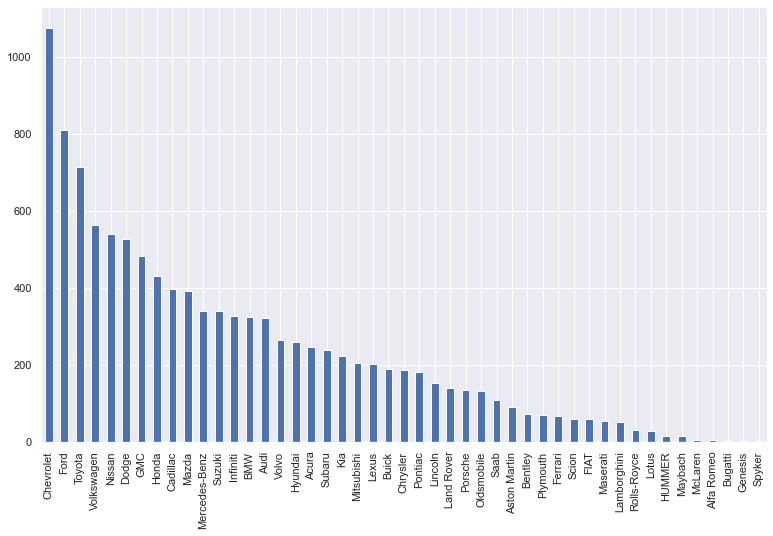

In [11]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
make_bar = df.Make.value_counts() # Created a variable that includes all of the makes in cars.csv
                                  # using the value counts function
make_bar.plot(kind='bar', figsize=(13 ,8)) # use the plot function on make_bar 

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

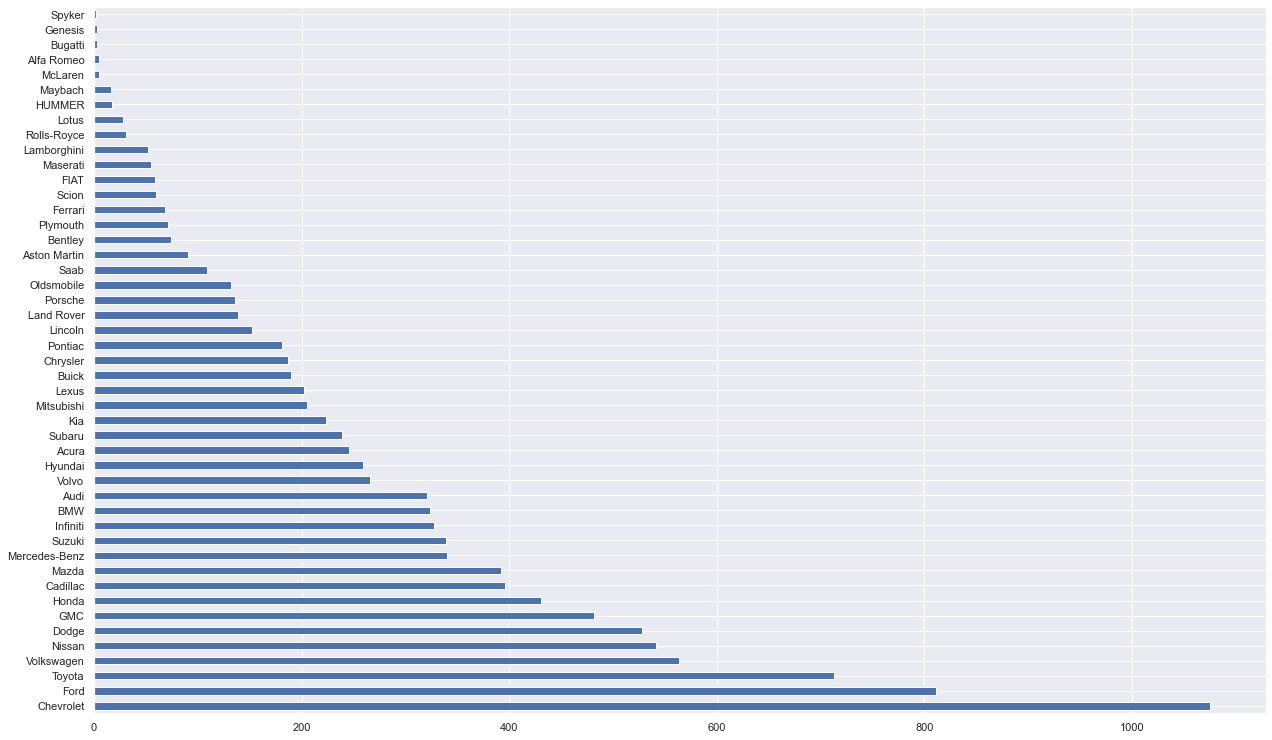

In [12]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

make_bar.plot(kind='barh', figsize=(21, 13)) # Changed kind to barh and increased the figsize

### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


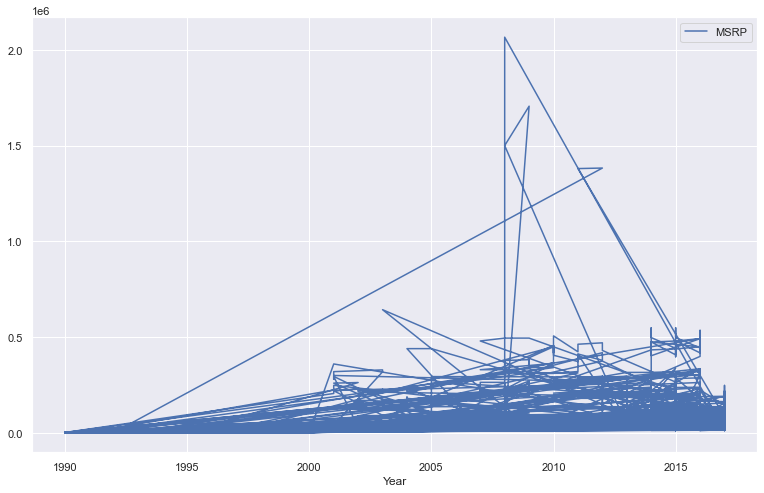

In [17]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

df.plot(kind='line', x='Year', y='MSRP', figsize=(13, 8))
# This seems wrong, Either I am doing this wrong or this shouldn't be represented as a 
# line graph. I don't think this should be represented using a line graph as line graphs
# have data points that can be connected together but this just seems like too much data
# points to be connected together 

# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.  
_Hint use `np.where()`_.

In [24]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.

cond = df['Year'] < 2000
df['adjusted_price'] = np.where(cond, df['MSRP']*10, 0)
df.tail(80)
# I created my condition which is searching for cars made before the year 2000, and what I do 
# when I meet that condition is take the MSRP value at whatever row I am at that meets the 
# specific condition and mulitply by 10, assigning that new MSRP value to the newly created 
# adjusted price column

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
11834,GMC,Yukon Hybrid,2011,regular unleaded,332.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,4dr SUV,23,20,549,51610,0
11835,GMC,Yukon Hybrid,2011,regular unleaded,332.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,23,20,549,61770,0
11836,GMC,Yukon Hybrid,2011,regular unleaded,332.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,4dr SUV,23,20,549,58925,0
11837,GMC,Yukon Hybrid,2012,regular unleaded,332.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,23,20,549,55280,0
11838,GMC,Yukon Hybrid,2012,regular unleaded,332.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,23,20,549,63130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,0
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,0
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,0
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,0


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


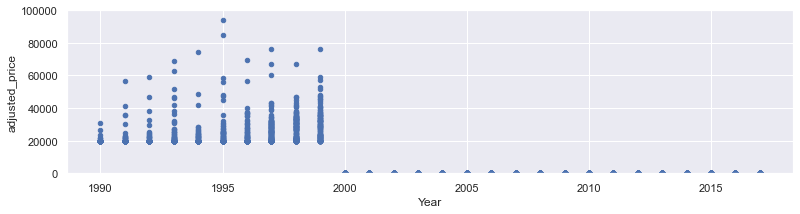

In [36]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000

df.plot(kind='scatter', x='Year', y='adjusted_price', figsize=(13, 3), ylim=(0, 100000))

# What car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. _Hint, you can use df.head(5) for this_.
* Use our `adjusted_price` column for this

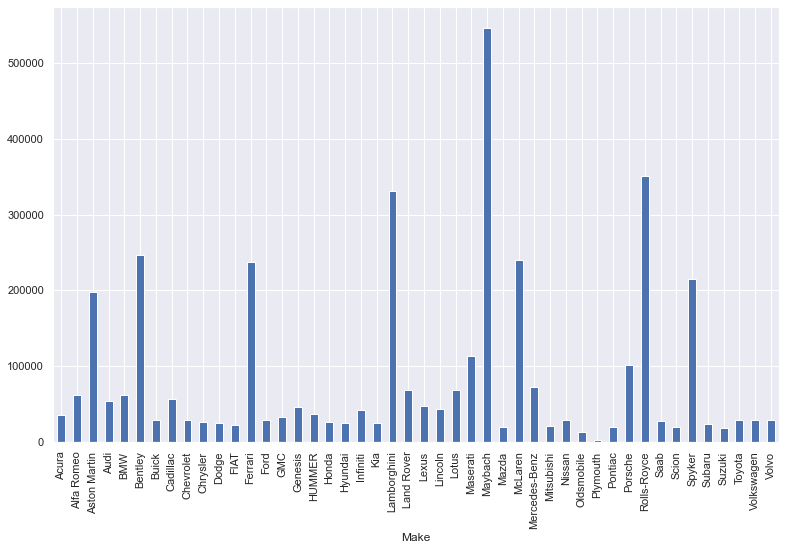

In [68]:
# What top 5 car makers make the most expensive cars on average. 

gb = df.groupby('Make')['MSRP'].mean()
gb.plot(kind='bar', figsize=(13,8))
# Maybach, Rolls Royce, Lamborghini, Bentley, McLaren

# What are the top 5 car makers that have the highest median highway MPG?

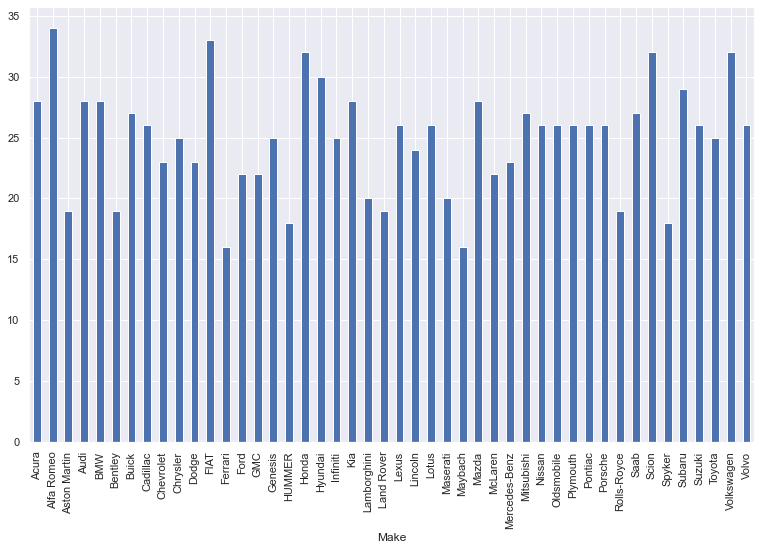

In [69]:
# Which car makers have the highest median highway MPG?

gb = df.groupby('Make')['highway MPG'].median()
gb.plot(kind='bar', figsize=(13,8))
# Alta Romeo, FIAT, Honda, Scion, Volkswagen

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

In [50]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.

cond1 = df['Make'] == 'Chevrolet'
cond2 = df['Make'] == 'Ford'
cond3 = df['Make'] == 'Toyota'
c = cond1 & cond2 & cond3
df['new_adjusted_price'] = np.where(c, df['adjusted_price'], 0)

sns.histplot(data=df, x='Make', y='new_adjusted_price')

AttributeError: module 'seaborn' has no attribute 'histplot'

# Remake the same histogram, but limit the x-axis from 0 to 100,000

In [52]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

gr = sns.histplot(data=df, x='Make', y='new_adjusted_price', xlim=(0, 100000))
gr

AttributeError: module 'seaborn' has no attribute 'histplot'

# Plot the relationship between Engine HP and highway MPG

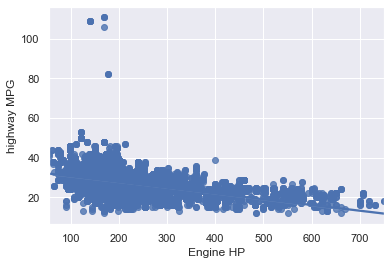

In [70]:
# Plot the relationship between Engine HP and highway MPG

#ax = sns.scatterplot(data=df, x='Engine HP', y='highway MPG');
#ax.set_title("Relationship Between Engine HP and highway MPG");
select_cond = df['highway MPG'] < 350
select_cond2 = df['Engine HP'] < 1000

df = df[select_cond]
df = df[select_cond2]

#df.plot(kind='scatter', x='Engine HP', y='highway MPG')
ax = sns.regplot(data=df, x='Engine HP', y='highway MPG')
ax
# It seems like there is not a huge correlation but definitely the higher your Engine HP value
# is, the less MPG you have and the less Engine HP value you have, the more MPG you have

# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

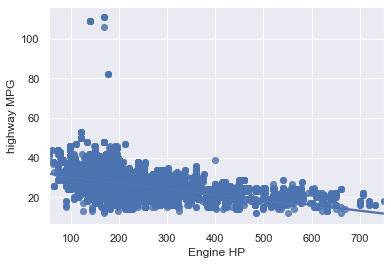

In [78]:
df = df.dropna()

# Create a list of just our columns we want to filter
car_cols = ['Engine HP', 'highway MPG']

# Create an empty list that will store our new z-score column names
z_score_cols = []

# Loop through the columns
for col in car_cols:
    
    # Create a new column name that is the old column name + 'z_score'
    new_col_name = col + '_zscore'
    
    # Call the zscore function on the column in our df, set it equal to the new column name
    df[new_col_name] = stats.stats.zscore(df[col])
    
    # Convert all values into absolute values. 
    df[new_col_name] = abs(df[new_col_name])
    
    # Append the new column name to our z_score_cols list for easier access
    z_score_cols.append(new_col_name)

# This is our selection mask which is anwhere the zscore is greater than 3
cond = df[z_score_cols] < 3

# If any of the rows are true, set to true, else set to false
cond = cond.any(axis=1)

# Apply the condition mask
df_copy = df.copy()
newdf = df_copy[cond]

ax = sns.regplot(data=newdf, x='Engine HP', y='highway MPG')
ax

# What does this plot tell you about how Engine HP affects highway MPG?

In [26]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('I do not know what I did wrong as it is showing the same graph as before')

YOUR ANSWER HERE


# Using a pairplot, display all of the linear relationships.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

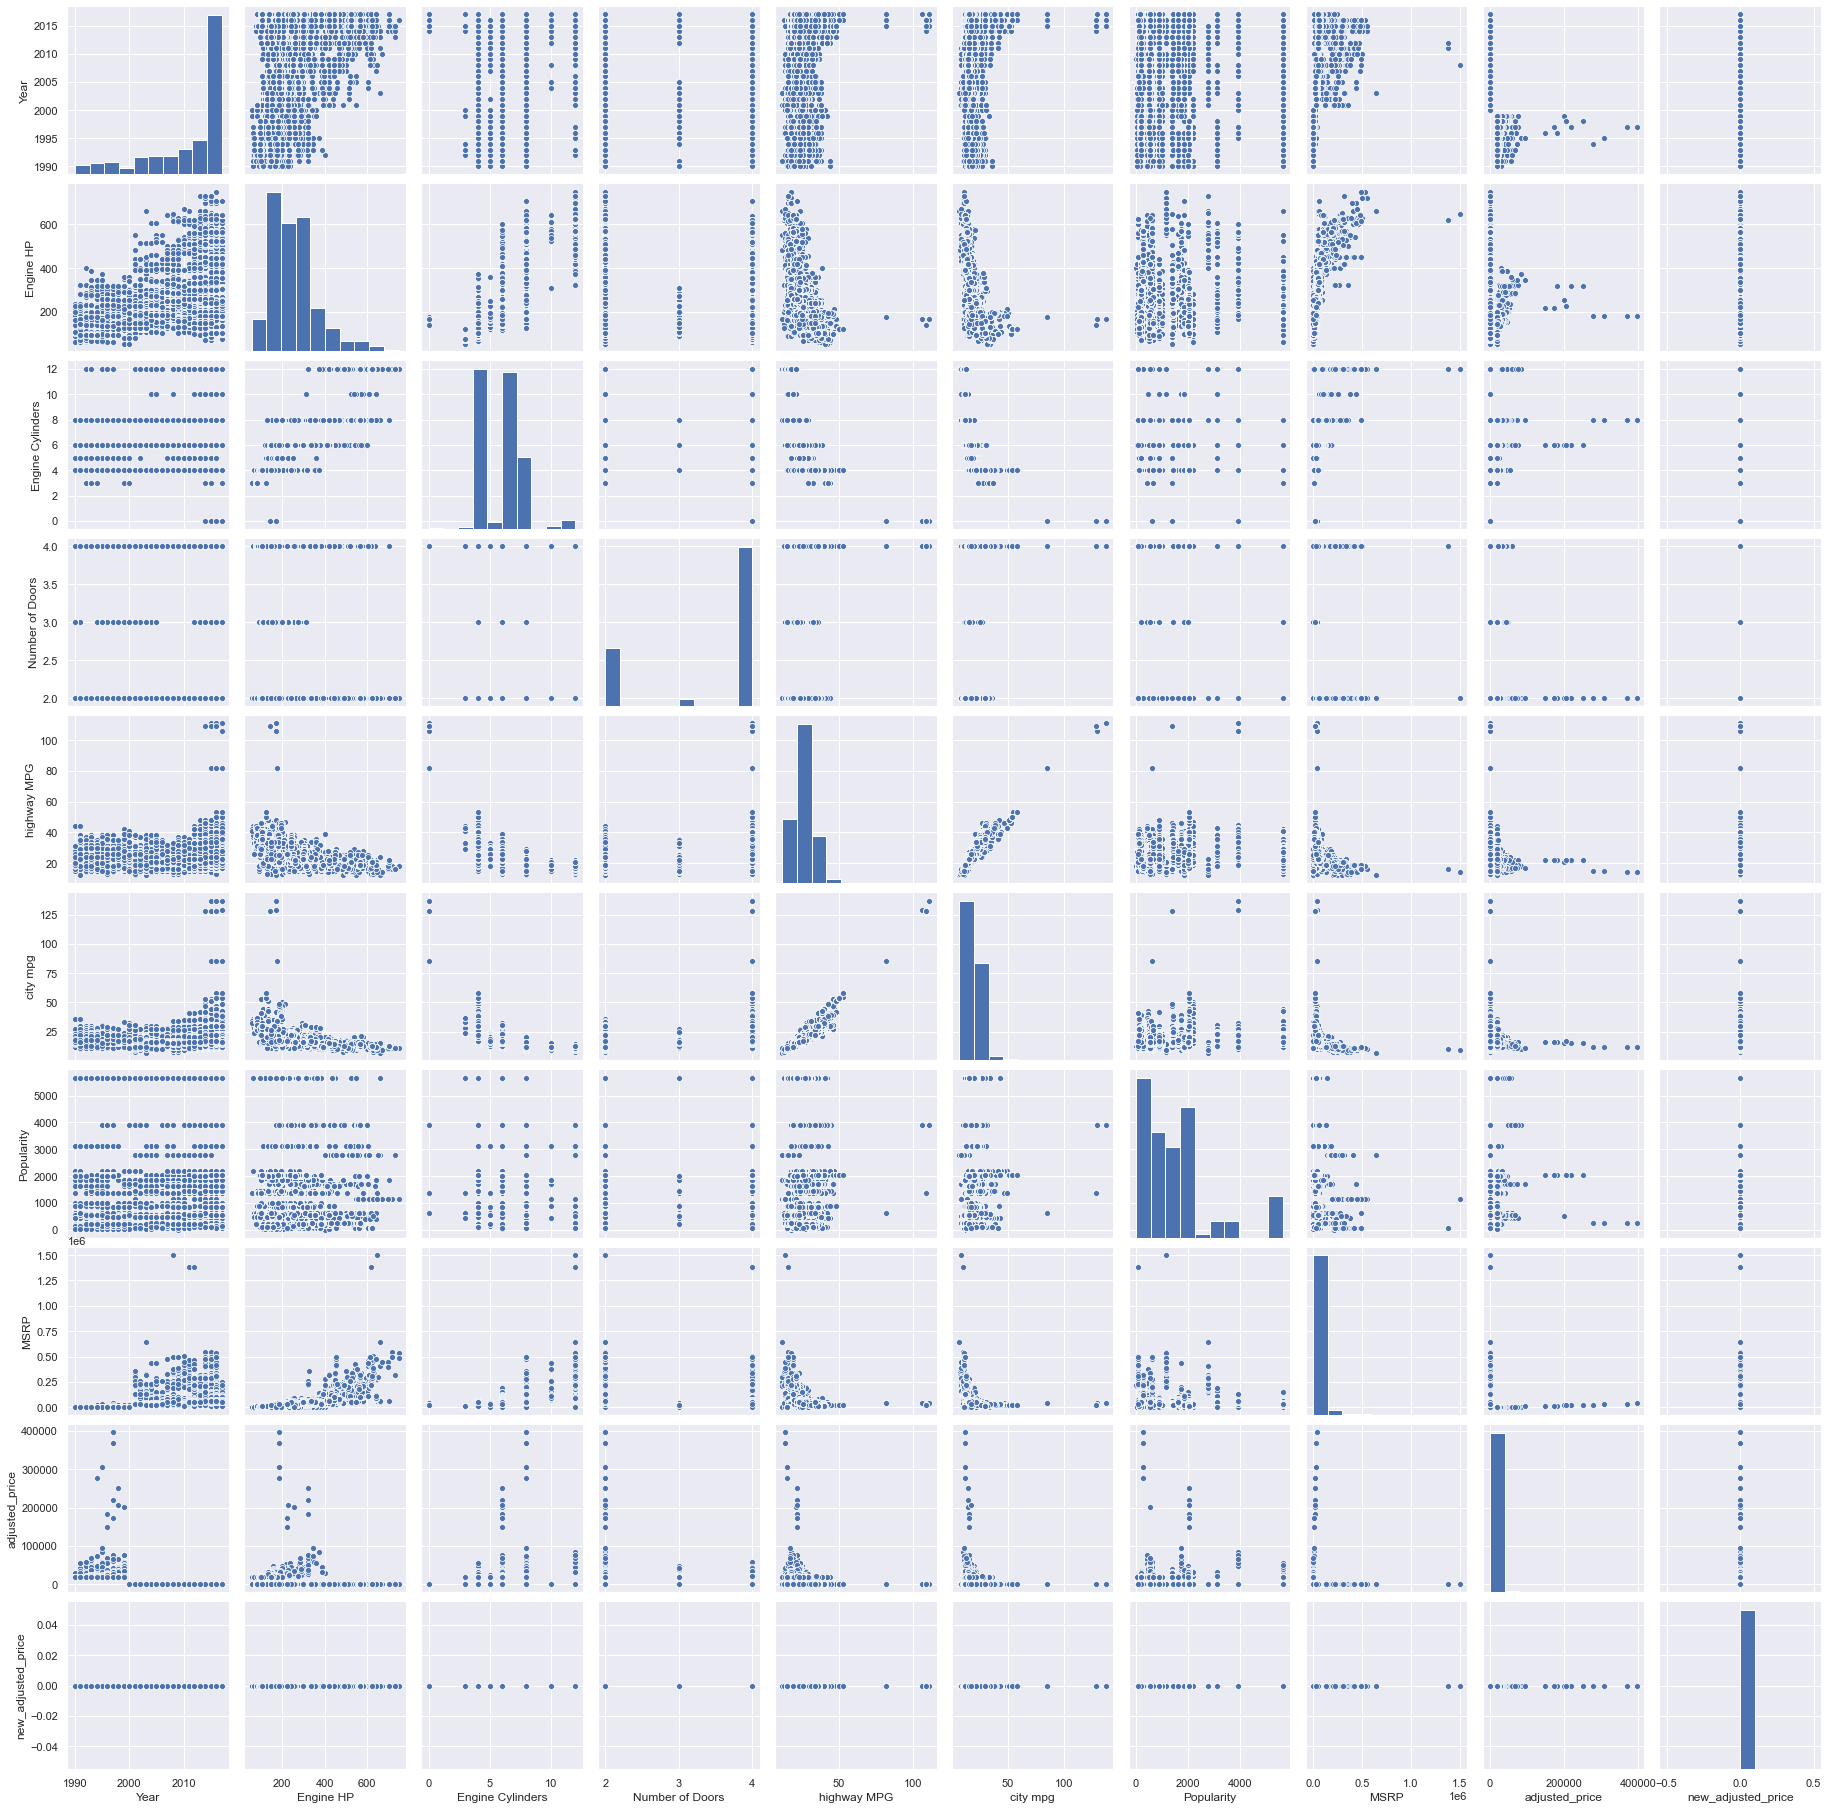

In [71]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df)

In [72]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('highway MPG & city MPG | Year & MSRP - slightly | Engine HP & MSRP - slightly')

# I do not see the linear relationship between MSRP and adjusted price so I must've done 
# something wrong 

highway MPG & city MPG | Year & MSRP - slightly | Engine HP & MSRP - slightly


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

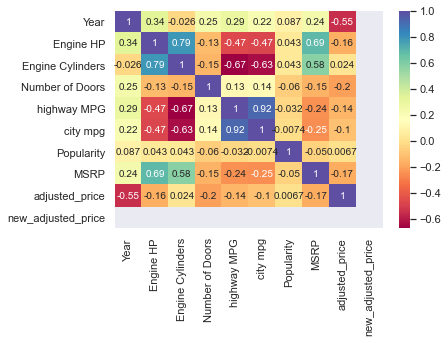

In [74]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

sns.heatmap(df.corr(), annot=True, cmap='Spectral')
# Not sure how to change the figure size to 8x8
# Engine HP has the strongest relationship with Engine Cylinders, because the engine cylinders 
# affect how much horsepower your engine has, not a car guy but I imagine the amount of
# cylinders directly affects how powerful your engine is

# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [30]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well




# Extra Credit part 2
Rebuild the charts you made but using the interactive plotting library, Plotly:  https://plotly.com/python/.  
* You may need to install plotly by running `pip install plotly` in your terminal. 